In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy.stats import entropy
from sklearn.preprocessing import normalize
import pandas as pd
from collections import Counter
from scipy.stats import pearsonr, spearmanr
from scipy.stats import entropy
from scipy import stats
import matplotlib.pyplot as plt
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
import seaborn as sns
from scipy import stats
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import ast

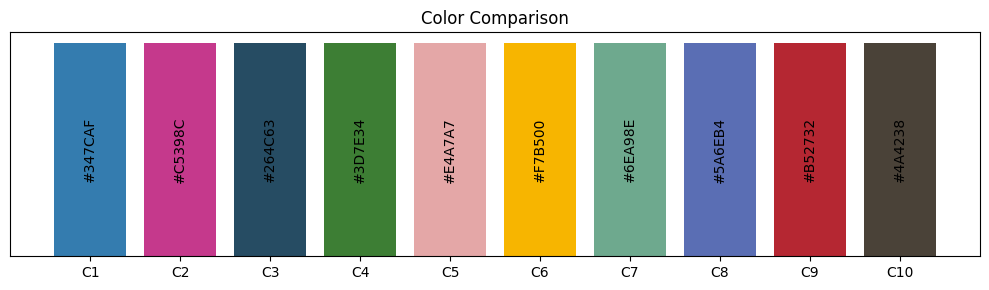

In [2]:
colors_xuwen = ['#347CAF','#C5398C','#264C63','#3D7E34','#E4A7A7','#F7B500','#6EA98E','#5A6EB4','#B52732','#4A4238']


# 栏标签
labels = [f'C{i+1}' for i in range(len(colors_xuwen))]

# 随便用1-10的高度，只是为了显示
heights = [1]*len(colors_xuwen)

plt.figure(figsize=(10,3))
bars = plt.bar(labels, heights, color=colors_xuwen)

# 去掉Y轴
plt.yticks([])

# 添加颜色代码标签
for bar, color in zip(bars, colors_xuwen):
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        0.5, 
        color, 
        ha='center', 
        va='center', 
        color='black', 
        fontsize=10,
        rotation=90
    )

plt.title('Color Comparison')
plt.tight_layout()
plt.show()

In [3]:
def format_p_value(p):
    if p < 1e-4:
        return f'p < 1e-4'
    else:
        return f'p = {p:.1e}'

In [4]:
def compute_stats(col):
    mean_list = []
    std_list = []
    median_list = []

    for val in df[col]:
        numbers = ast.literal_eval(val)  # 把 '[0.9, 0.8, ...]' 转换为 [0.9, 0.8, ...]
        mean_list.append(np.mean(numbers))
        std_list.append(np.std(numbers))
        median_list.append(np.median(numbers))  # 👈 计算中位数

    return mean_list, std_list, median_list


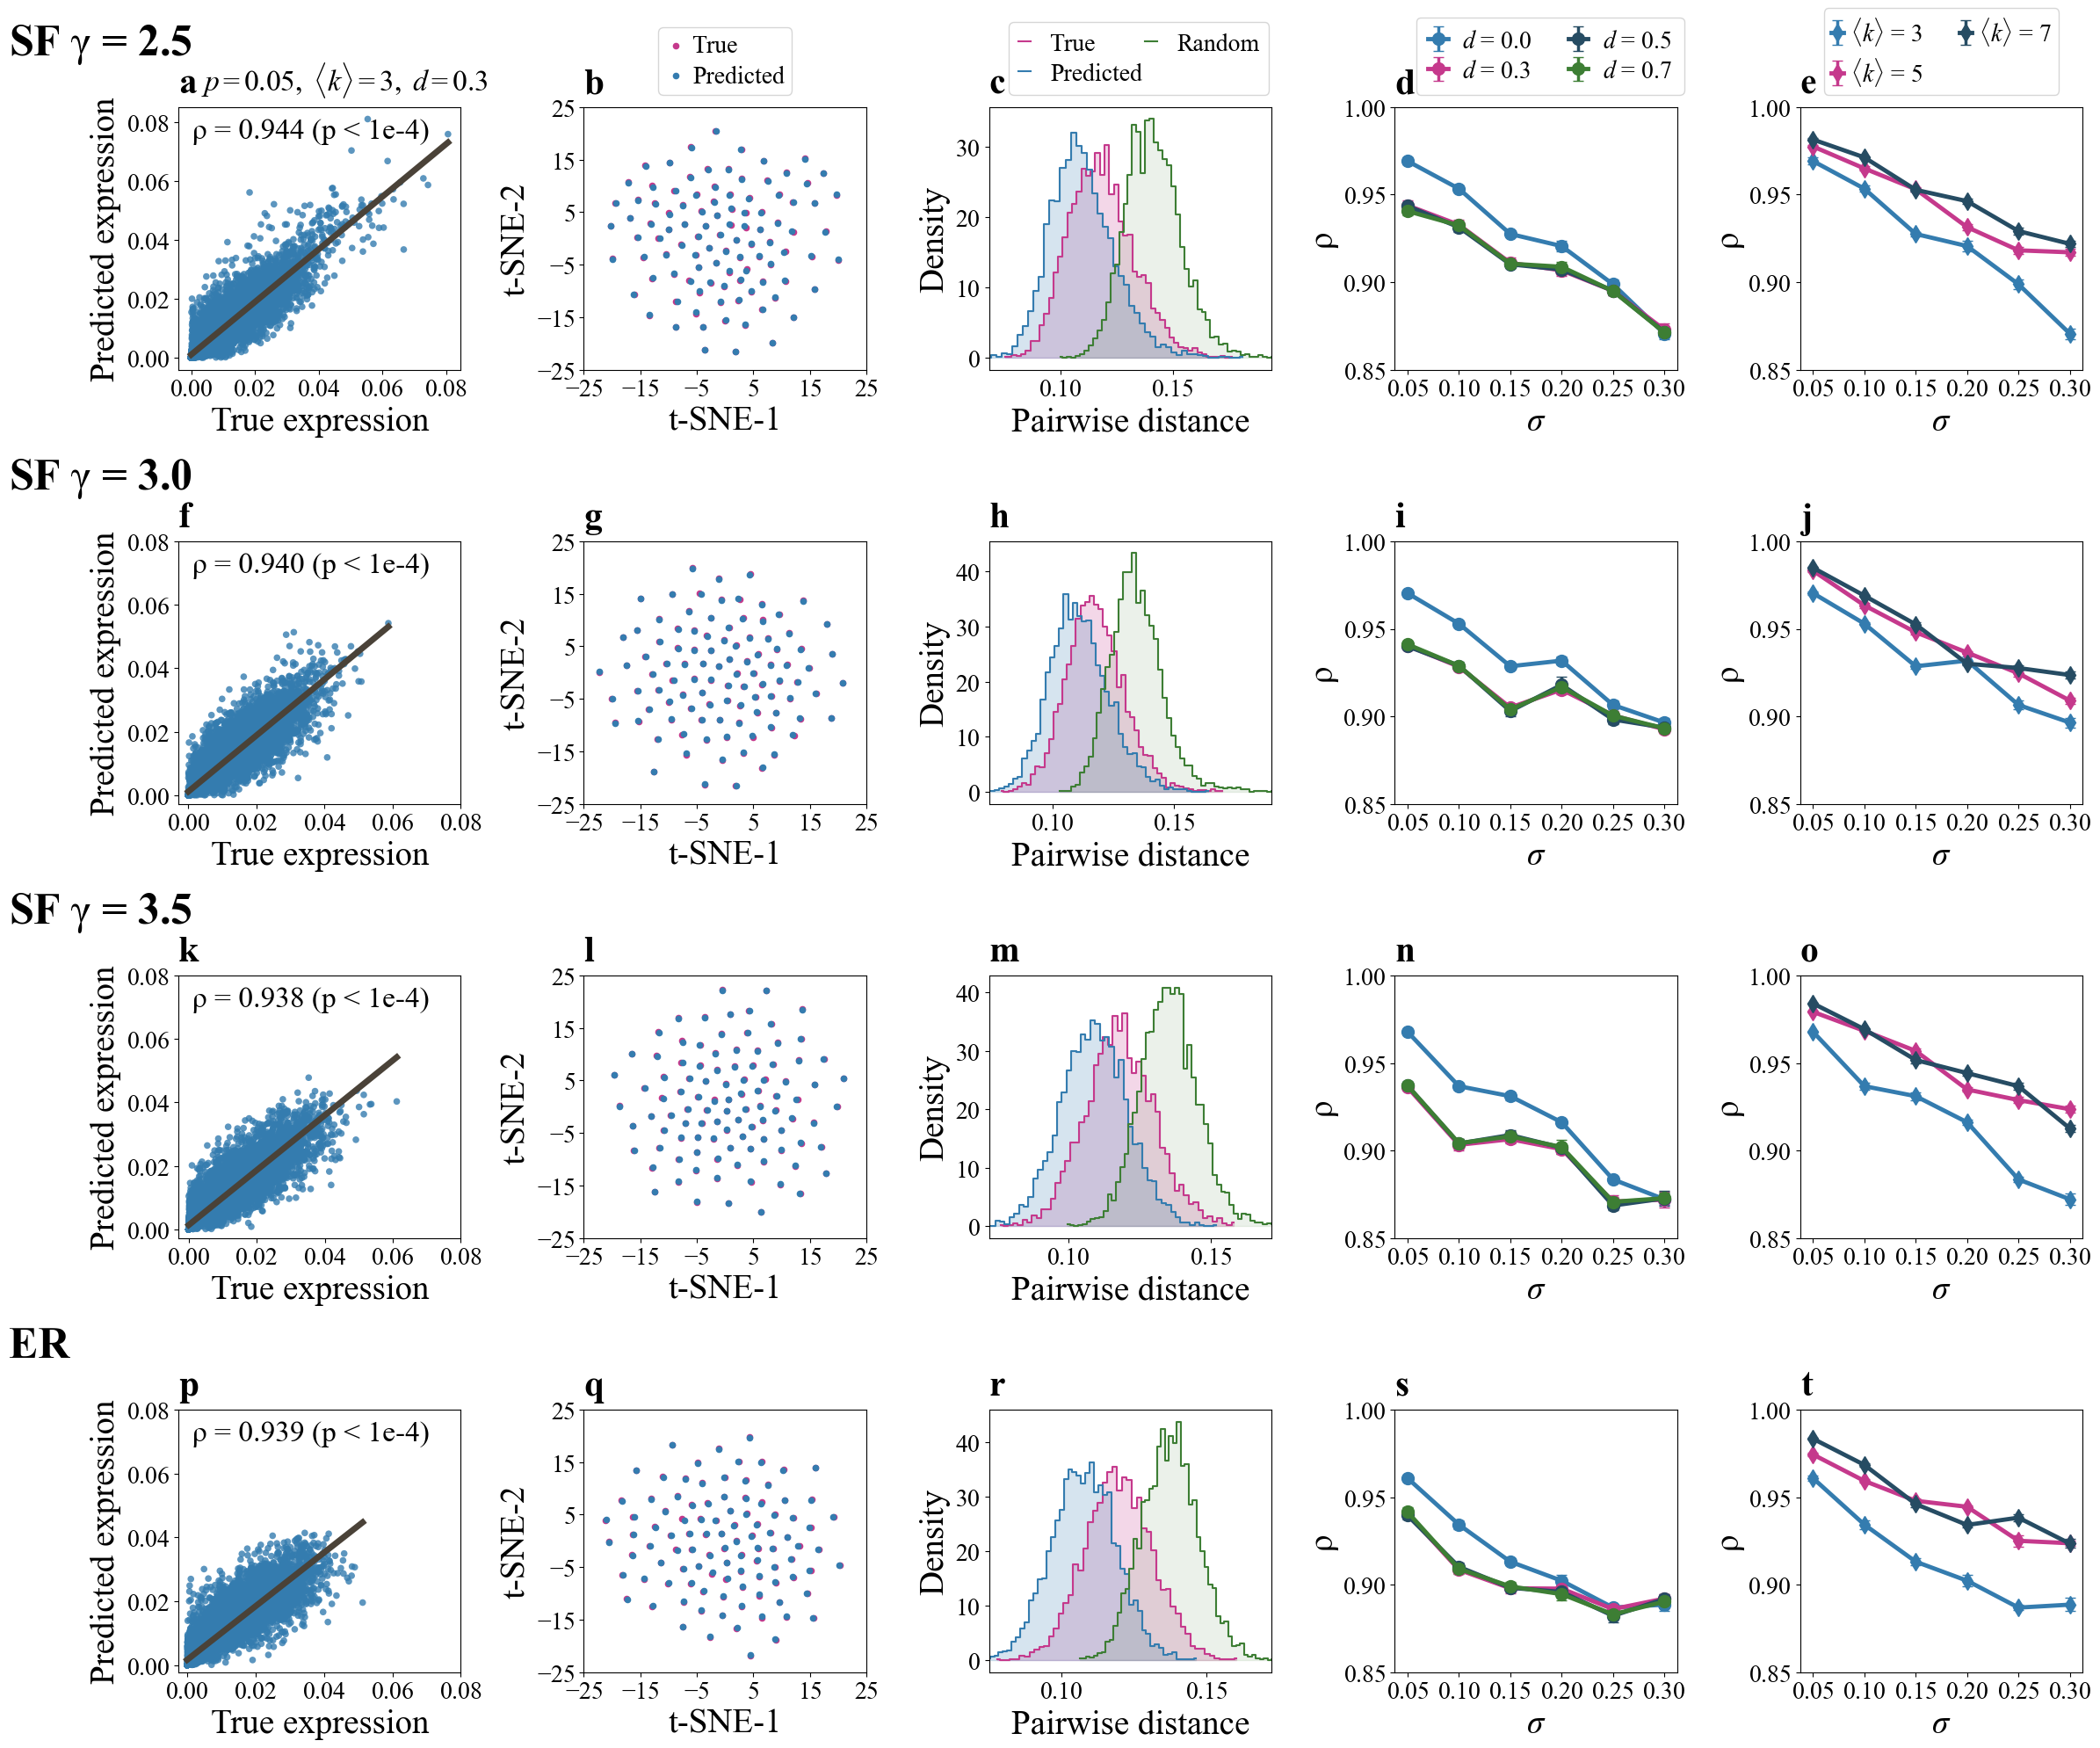

In [5]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],  # 指定英文字体
    "mathtext.fontset": "custom",      # 自定义数学字体
    "mathtext.it": "Times New Roman:italic",  # 斜体
    "mathtext.rm": "Times New Roman",         # 正体
    "mathtext.bf": "Times New Roman:bold",    # 粗体
    "axes.formatter.use_mathtext": True       # 强制使用数学字体
})
plt.rcParams['font.family'] = 'Times New Roman'  # 所有非公式部分默认字体
plt.rcParams['mathtext.default'] = 'regular'      # LaTeX 数学字体常规

plt.rcParams.update({
    "text.usetex": False,      # 禁用 LaTeX 渲染
    "mathtext.default": "it",  # 数学符号默认使用斜体
})


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist

# 可调参数
xtick_fontsize = 20
label_fontsize = 28
label_top_fontsize = 20

row_labels = [
    r"SF $\mathrm{\gamma}$ = 2.5",  # 使用 \mathrm 来使 $\gamma$ 为正体
    r"SF $\mathrm{\gamma}$ = 3.0",  # 使用 \mathrm 来使 $\gamma$ 为正体
    r"SF $\mathrm{\gamma}$ = 3.5",  # 使用 \mathrm 来使 $\gamma$ 为正体
    "ER ",  # 其他文本保持普通字体
]

row_labelscount = 0
letters = list("abcdefghijklmnopqrstuvwxyz")

# 文件名对应标签
network_types = [ '2.5', '3.0', '3.5','er']
n_rows, n_cols = len(network_types), 5

# 创建画布
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 20))
letter_count = 0

# 遍历每种网络结构
for row_idx, net_type in enumerate(network_types):
    pred_profile = pd.read_csv(f'./mapping_pred_ad_3_p_0.05_dropout_0.3_{net_type}.csv', header=None).values.astype(float)
    true_profile = pd.read_csv(f'./mapping_true_ad_3_p_0.05_dropout_0.3_{net_type}.csv', header=None).values.astype(float)
    df = pd.read_csv(f'./all_mapping_results_{net_type}.csv')

    df["pearson_mean"], df["pearson_std"], df["pearson_median"] = compute_stats("pearson")
    df["spearman_mean"], df["spearman_std"], df["spearman_median"] = compute_stats("spearman")


    ###########################################
    # 图1：True vs Predicted 相关性散点图
    ax = axes[row_idx, 0]
    true_flat = true_profile.flatten()
    pred_flat = pred_profile.flatten()

    pearson_r, pearson_p = stats.pearsonr(true_flat, pred_flat)
    spearman_r, spearman_p = stats.spearmanr(true_flat, pred_flat)

    ax.scatter(true_flat, pred_flat, alpha=0.8, s=30, color=colors_xuwen[0], edgecolor='none')
    sns.regplot(x=true_flat, y=pred_flat, scatter=False,
                line_kws={'color': colors_xuwen[-1], 'linewidth': 5}, ci=95, ax=ax)

    ax.text(0.05, 0.96, f'ρ = {spearman_r:.3f} ({format_p_value(spearman_p)})', transform=ax.transAxes,
            ha='left', va='top', fontsize=label_fontsize-4)
    ax.set_xlabel('True expression', fontsize=label_fontsize)
    ax.set_ylabel('Predicted expression', fontsize=label_fontsize)
    ax.set_xticks(np.arange(0, 0.1, 0.02))
    ax.set_yticks(np.arange(0, 0.1, 0.02))
    ax.tick_params(axis='both', labelsize=xtick_fontsize)
    
    if row_idx == 0:
        ax.text(0.58, 1.03, r'$\ p=0.05,\ \langle k \rangle=3,\ d=0.3$', transform=ax.transAxes,
            ha='center', va='bottom', fontsize=label_fontsize-4)
    ax.text(0.0, 1.15, f'{letters[letter_count]}', transform=ax.transAxes,
            fontsize=label_fontsize+2, fontweight='bold', va='top', ha='left')
    letter_count += 1
    
    ####添加网络类型
    ax.text(-0.6, 1.2, row_labels[row_labelscount], transform=ax.transAxes,
         fontsize=label_fontsize+8,fontweight='bold')
    row_labelscount+=1
    
    
    ###########################################
    # 图2：t-SNE 可视化
    ax = axes[row_idx, 1]
    all_data = np.vstack((true_profile, pred_profile))
    tsne = TSNE(n_components=2, random_state=42)
    all_embedded = tsne.fit_transform(all_data)
    true_embedded = all_embedded[:len(true_profile)]
    pred_embedded = all_embedded[len(pred_profile):]

    ax.scatter(true_embedded[:, 0], true_embedded[:, 1], c=colors_xuwen[1], label='True', s=20)
    ax.scatter(pred_embedded[:, 0], pred_embedded[:, 1], c=colors_xuwen[0], label='Predicted', s=20)
    if row_idx == 0:
        ax.legend(
            loc='lower center',
            bbox_to_anchor=(0.5, 1.0),
            bbox_transform=ax.transAxes,
            ncol=1,
            fontsize=label_top_fontsize,
            handlelength=0.8,
            frameon=True,             # 留边框
            labelspacing=0.3,         # 👈 控制垂直间距（默认 0.5）
            columnspacing=1.5,        # 👈 控制水平间距（对 ncol > 1 时有用）
            handletextpad=0.3,        # 图例前的 marker 和文字的间距
            borderpad=0.3             # 图例内容和边框之间的内边距
        )
#         ax.text(0.5, 1.15, rf'$\ p=0.05,\ \langle k \rangle=3,\ d=0.3$', transform=ax.transAxes,
#             ha='center', va='bottom', fontsize=label_fontsize - 6)
        
    ax.set_xlabel("t-SNE-1", fontsize=label_fontsize)
    ax.set_ylabel("t-SNE-2", fontsize=label_fontsize)
    ax.tick_params(axis='both', labelsize=xtick_fontsize)
    all_x = np.concatenate([true_embedded[:, 0], pred_embedded[:, 0]])
    all_y = np.concatenate([true_embedded[:, 1], pred_embedded[:, 1]])
    ax.set_xlim(min(all_x) * 0.95, max(all_x) * 1.05)
    ax.set_ylim(min(all_y) * 0.95, max(all_y) * 1.05)
    ax.set_xticks(np.arange(-25, 30, 10))
    ax.set_yticks(np.arange(-25, 30, 10))
#     ax.legend(loc='upper right', fontsize=label_fontsize - 16, handlelength=0.5)
    ax.text(0.0, 1.15, f'{letters[letter_count]}', transform=ax.transAxes,
            fontsize=label_fontsize+2, fontweight='bold', va='top', ha='left')
    letter_count += 1

    ###########################################
    # 图3：Pairwise Distance 分布图
    ax = axes[row_idx, 2]
    true_dist = pdist(true_profile, 'euclidean')
    pred_dist = pdist(pred_profile, 'euclidean')

    shuffled = true_profile.copy()
    for i in range(shuffled.shape[0]):
        np.random.shuffle(shuffled[i, :])
    shuffled_dist = pdist(shuffled, 'euclidean')

    def plot_dist(dist, label, color, alpha, ax):
        counts, bins = np.histogram(dist, bins=50, density=True)
        ax.fill_between(bins[:-1], counts, step='mid', alpha=alpha, color=color)
        ax.step(bins[:-1], counts, where='mid', label=label, color=color)

    all_dist = np.concatenate([true_dist, pred_dist, shuffled_dist])
    min_x, max_x = np.min(all_dist), np.max(all_dist)
    ax.set_xlim(min_x + 0.02 * (max_x - min_x), max_x - 0.02 * (max_x - min_x))

    plot_dist(true_dist, "True", colors_xuwen[1], 0.2, ax)
    plot_dist(pred_dist, "Predicted", colors_xuwen[0], 0.2, ax)
    plot_dist(shuffled_dist, "Random", colors_xuwen[3], 0.1, ax)

    ax.set_xlabel('Pairwise distance', fontsize=label_fontsize)
    ax.set_ylabel('Density', fontsize=label_fontsize)
    ax.tick_params(axis='both', labelsize=xtick_fontsize)
    if row_idx ==0:
        ax.legend(
            loc='lower center',
            bbox_to_anchor=(0.53, 1.0),           # 👈 把图例浮到子图上方
            bbox_transform=ax.transAxes,         # 👈 比例坐标
            ncol=2,
            labelspacing=0.3,         # 👈 控制垂直间距（默认 0.5）
            columnspacing=0.1,        # 👈 控制水平间距（对 ncol > 1 时有用）
            fontsize=label_top_fontsize,
            handlelength=0.5,#横轴先的长度
            frameon=True#留筐
        )
    
    ax.text(0.0, 1.15, f'{letters[letter_count]}', transform=ax.transAxes,
            fontsize=label_fontsize+2, fontweight='bold', va='top', ha='left')
    letter_count += 1


    ###########################################
    # 图4：不同 dropout 的影响
    ax = axes[row_idx, 3]
    df_d3 = df[df["averge_deg"] == 3]
    dropout_levels = sorted(df_d3["dropout"].unique())
    for i, d in enumerate(dropout_levels):
        sub_df = df_d3[df_d3["dropout"] == d].sort_values(by="perturb")
        ax.errorbar(
            sub_df["perturb"], sub_df["spearman_mean"],
            yerr=sub_df["spearman_std"],
            label=fr'$d$ = {d}',
            capsize=4, elinewidth=2.5, linewidth=3.5,
            marker='o', markersize=10, color=colors_xuwen[i]
        )
    ax.set_xlabel('$\sigma$', fontsize=label_fontsize)
    ax.set_ylabel('ρ', fontsize=label_fontsize)
    ax.set_yticks(np.arange(0.85, 1, 0.05))
    ax.tick_params(axis='both', labelsize=xtick_fontsize)
    ax.set_xticks(sorted(df_d3["perturb"].unique()))
#     ax.legend(fontsize=label_fontsize - 18, handlelength=0.5, labelspacing=0.4)
    if row_idx == 0:
        ax.legend(
            loc='lower center',
            bbox_to_anchor=(0.55, 1.0),           # 👈 把图例浮到子图上方
            bbox_transform=ax.transAxes,         # 👈 比例坐标
            ncol=2,
            fontsize=label_top_fontsize,
            handlelength=0.8,
            frameon=True,             # 留边框
            labelspacing=0.3,         # 👈 控制垂直间距（默认 0.5）
            columnspacing=1.5,        # 👈 控制水平间距（对 ncol > 1 时有用）
            handletextpad=0.6,        # 图例前的 marker 和文字的间距
            borderpad=0.5             # 图例内容和边框之间的内边距
        )
    ax.text(0.0, 1.15, f'{letters[letter_count]}', transform=ax.transAxes,
            fontsize=label_fontsize+2, fontweight='bold', va='top', ha='left')
    letter_count += 1

    ###########################################
    # 图5：不同 average_deg 的影响
    ax = axes[row_idx, 4]
    df_d03 = df[df["dropout"] == 0.0]
    deg_levels = sorted(df_d03["averge_deg"].unique())
    for i, deg in enumerate(deg_levels):
        sub_df = df_d03[df_d03["averge_deg"] == deg].sort_values(by="perturb")
        ax.errorbar(
            sub_df["perturb"], sub_df["spearman_mean"],
            yerr=sub_df["spearman_std"],
            label=fr'$\langle k \rangle$ = {deg}',
            capsize=4, elinewidth=2.5, linewidth=3.5,
            marker='d', markersize=10, color=colors_xuwen[i]
        )
    ax.set_xlabel('$\sigma$', fontsize=label_fontsize)
    ax.set_ylabel('ρ', fontsize=label_fontsize)
    ax.set_yticks(np.arange(0.85, 1, 0.05))
    ax.tick_params(axis='both', labelsize=xtick_fontsize)
    ax.set_xticks(sorted(df_d03["perturb"].unique()))
    if row_idx == 0:
        ax.legend(
            loc='lower center',
            bbox_to_anchor=(0.5, 1.0),           # 👈 把图例浮到子图上方
            bbox_transform=ax.transAxes,         # 👈 比例坐标
            ncol=2,
            fontsize=label_top_fontsize,
            handlelength=0.5,
            labelspacing=0.3,         # 👈 控制垂直间距（默认 0.5）
            columnspacing=1.5,        # 👈 控制水平间距（对 ncol > 1 时有用）
            handletextpad=0.3,        # 图例前的 marker 和文字的间距
            borderpad=0.3,             # 图例内容和边框之间的内边距
            frameon=True#留筐
        )
    
    
#     ax.text(0.5, 1.02, rf'${net_type.upper()},\ d = 0.3$', transform=ax.transAxes,
#             ha='center', va='bottom', fontsize=label_fontsize - 6)
    ax.text(0.0, 1.15, f'{letters[letter_count]}', transform=ax.transAxes,
            fontsize=label_fontsize+2, fontweight='bold', va='top', ha='left')
    letter_count += 1

# 统一布局与展示
plt.tight_layout()
# plt.savefig('./Fig2_Mapping.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:

# 可调参数
xtick_fontsize = 20
label_fontsize = 28
label_top_fontsize = 20

row_labels = [
    r"SF $\mathrm{\gamma}$ = 2.5",  # 使用 \mathrm 来使 $\gamma$ 为正体
    r"SF $\mathrm{\gamma}$ = 3.0",  # 使用 \mathrm 来使 $\gamma$ 为正体
    r"SF $\mathrm{\gamma}$ = 3.5",  # 使用 \mathrm 来使 $\gamma$ 为正体
    "ER ",  # 其他文本保持普通字体
]

row_labelscount = 0
letters = list("abcdefghijklmnopqrstuvwxyz")

# 文件名对应标签
network_types = [ '2.5', '3.0', '3.5','er']
n_rows, n_cols = len(network_types), 4

# 创建画布
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 20))
letter_count = 0


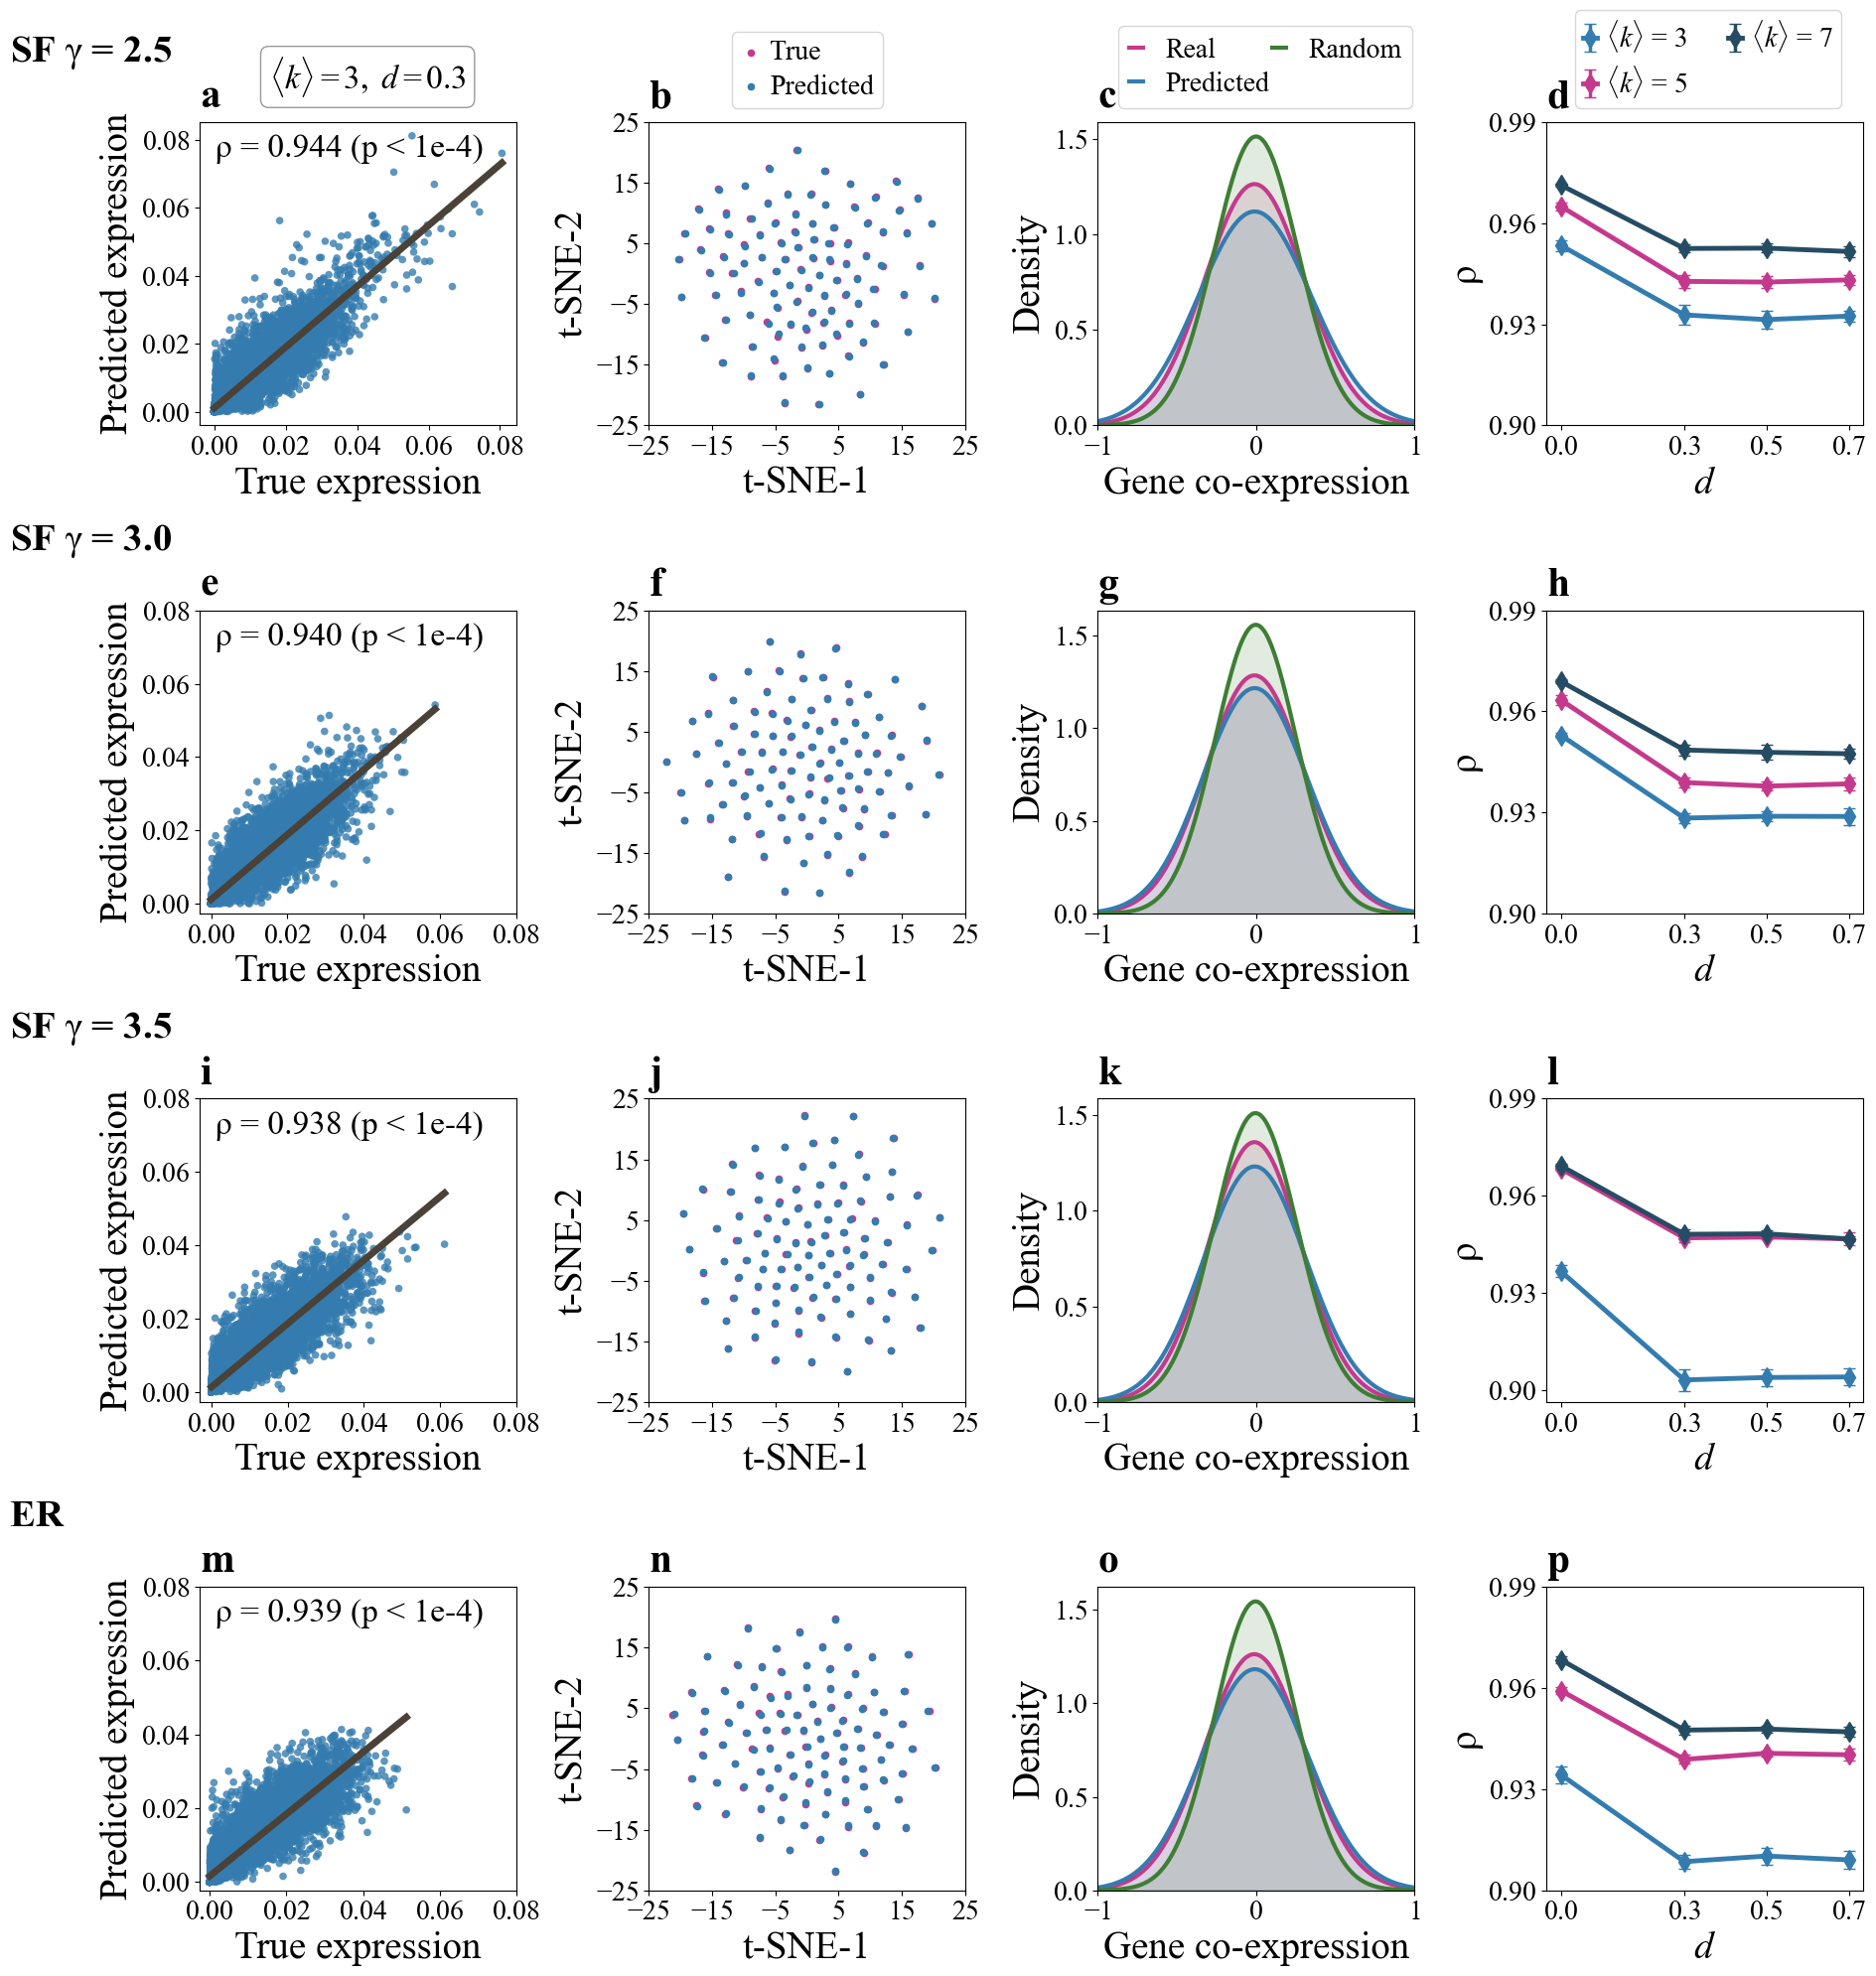

In [129]:
# ===== 放在 import 之后、for 循环之前：一些工具函数 =====
import ast
from scipy.stats import gaussian_kde

def shuffle_gene_wise(X, seed=42):
    """按基因列在细胞间打乱，生成“假细胞”"""
    rng = np.random.default_rng(seed)
    Xs = X.copy()
    for j in range(Xs.shape[1]):  # 列=genes
        rng.shuffle(Xs[:, j])
    return Xs

def gene_gene_corr(Z, method='spearman'):
    """对列（基因）之间求相关，返回 genes×genes 矩阵"""
    return pd.DataFrame(Z).corr(method=method).values

def upper_tri(M):
    """取上三角（不含对角线）向量"""
    iu = np.triu_indices(M.shape[0], 1)
    return M[iu]

# KDE（density）曲线
def kde_line(ax, data, color, label, *,
             fill_alpha=0.15, bw_scale=3.0, bw_rule='scott',
             line_width=3.0):                 # ← 新增
    data = np.asarray(data); data = data[~np.isnan(data)]
    if bw_rule == 'silverman':
        kde = gaussian_kde(data, bw_method=lambda s: bw_scale * s.silverman_factor())
    else:
        kde = gaussian_kde(data, bw_method=lambda s: bw_scale * s.scotts_factor())
    xs = np.linspace(-1, 1, 400)
    ys = kde(xs)
    ax.plot(xs, ys, color=color, label=label, lw=line_width)   # ← 用 line_width
    ax.fill_between(xs, 0, ys, color=color, alpha=fill_alpha)


# 解析 df['spearman'] 的“10次结果”为 list[float]
def parse_spearman_list(s):
    s = str(s).strip()
    if s.startswith('[') and s.endswith(']'):
        return np.array(ast.literal_eval(s), dtype=float)
    # 兜底：逗号分割
    return np.array([float(x) for x in s.split(',') if x.strip() != ''], dtype=float)

# 颜色（优先你的调色板）

COL_REAL, COL_PRED, COL_SHUF = colors_xuwen[1], colors_xuwen[0], colors_xuwen[3]
# COL_REAL = '#C44E52'
# COL_PRED = '#4C72B0'
# COL_SHUF = '#55A868'
# ====== 更新网格：4 列 -> 现在我们用 4 列（其中 3、4 列为新增分析） ======
# ====== Grid: 4 columns (col1=scatter, col2=tSNE, col3=KDE, col4=lines vs dropout) ======
n_rows, n_cols = len(network_types), 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(19, 20))
letter_count = 0
row_labelscount = 0

for row_idx, net_type in enumerate(network_types):
    # ---------- Load data for this network ----------
    pred_profile = pd.read_csv(f'./mapping_pred_ad_3_p_0.05_dropout_0.3_{net_type}.csv', header=None).values.astype(float)
    true_profile = pd.read_csv(f'./mapping_true_ad_3_p_0.05_dropout_0.3_{net_type}.csv', header=None).values.astype(float)
    df = pd.read_csv(f'./all_mapping_results_{net_type}.csv')
    df["pearson_mean"], df["pearson_std"], df["pearson_median"] = compute_stats("pearson")
    df["spearman_mean"], df["spearman_std"], df["spearman_median"] = compute_stats("spearman")

    # ---------- Col 1: True vs Predicted (scatter + regression line) ----------
    ax1 = axes[row_idx, 0]
    true_flat = true_profile.flatten()
    pred_flat = pred_profile.flatten()

    pearson_r, pearson_p = stats.pearsonr(true_flat, pred_flat)
    spearman_r, spearman_p = stats.spearmanr(true_flat, pred_flat)

    ax1.scatter(true_flat, pred_flat, alpha=0.8, s=30, color=colors_xuwen[0], edgecolor='none')
    sns.regplot(x=true_flat, y=pred_flat, scatter=False,
                line_kws={'color': colors_xuwen[-1], 'linewidth': 5}, ci=95, ax=ax1)

    ax1.text(0.05, 0.96, f'ρ = {spearman_r:.3f} ({format_p_value(spearman_p)})',
             transform=ax1.transAxes, ha='left', va='top', fontsize=label_fontsize-4)
    ax1.set_xlabel('True expression', fontsize=label_fontsize)
    ax1.set_ylabel('Predicted expression', fontsize=label_fontsize)
    ax1.set_xticks(np.arange(0, 0.1, 0.02))
    ax1.set_yticks(np.arange(0, 0.1, 0.02))
    ax1.tick_params(axis='both', labelsize=xtick_fontsize)

    # Row header and top badge only on first row as needed
    if row_idx == 0:
        ax1.text(
            0.53, 1.075, r'$\langle k \rangle=3,\ d=0.3$',
            transform=ax1.transAxes, ha='center', va='bottom', fontsize=label_fontsize-4,
            bbox=dict(boxstyle='round,pad=0.25', facecolor='white', edgecolor='0.6',
                      linewidth=1.0, alpha=1.0),
            clip_on=False, zorder=10
        )
    ax1.text(0.0, 1.14, f'{letters[letter_count]}', transform=ax1.transAxes,
             fontsize=label_fontsize+2, fontweight='bold', va='top', ha='left')
    letter_count += 1

    # Row label at the left of col1
    ax1.text(-0.6, 1.2, row_labels[row_labelscount], transform=ax1.transAxes,
             fontsize=label_fontsize, fontweight='bold')
    row_labelscount += 1

    # ---------- Col 2: t-SNE visualization ----------
    ax2 = axes[row_idx, 1]
    all_data = np.vstack((true_profile, pred_profile))
    tsne = TSNE(n_components=2, random_state=42)
    all_embedded = tsne.fit_transform(all_data)
    true_embedded = all_embedded[:len(true_profile)]
    pred_embedded = all_embedded[len(pred_profile):]

    ax2.scatter(true_embedded[:, 0], true_embedded[:, 1], c=colors_xuwen[1], label='True', s=20)
    ax2.scatter(pred_embedded[:, 0], pred_embedded[:, 1], c=colors_xuwen[0], label='Predicted', s=20)
    if row_idx == 0:
        ax2.legend(
            loc='lower center',
            bbox_to_anchor=(0.5, 1.0),
            bbox_transform=ax2.transAxes,
            ncol=1,
            fontsize=label_top_fontsize,
            handlelength=0.8,
            frameon=True,
            labelspacing=0.3,
            columnspacing=1.5,
            handletextpad=0.3,
            borderpad=0.3
        )
    ax2.set_xlabel("t-SNE-1", fontsize=label_fontsize)
    ax2.set_ylabel("t-SNE-2", fontsize=label_fontsize)
    ax2.tick_params(axis='both', labelsize=xtick_fontsize)
    all_x = np.concatenate([true_embedded[:, 0], pred_embedded[:, 0]])
    all_y = np.concatenate([true_embedded[:, 1], pred_embedded[:, 1]])
    ax2.set_xlim(min(all_x) * 0.95, max(all_x) * 1.05)
    ax2.set_ylim(min(all_y) * 0.95, max(all_y) * 1.05)
    ax2.set_xticks(np.arange(-25, 30, 10))
    ax2.set_yticks(np.arange(-25, 30, 10))
    ax2.text(0.0, 1.14, f'{letters[letter_count]}', transform=ax2.transAxes,
             fontsize=label_fontsize+2, fontweight='bold', va='top', ha='left')
    letter_count += 1

    # ---------- Col 3: Gene–gene co-expression distribution (KDE) ----------
    ax3 = axes[row_idx, 2]
    Z_true = true_profile
    Z_pred = pred_profile
    Z_shuf = shuffle_gene_wise(Z_true, seed=42)

    C_true = gene_gene_corr(Z_true, method='spearman')
    C_pred = gene_gene_corr(Z_pred, method='spearman')
    C_shuf = gene_gene_corr(Z_shuf, method='spearman')

    v_true = upper_tri(C_true)
    v_pred = upper_tri(C_pred)
    v_shuf = upper_tri(C_shuf)

    kde_line(ax3, v_true, COL_REAL, 'Real',      bw_scale=13)
    kde_line(ax3, v_pred, COL_PRED, 'Predicted', bw_scale=13)
    kde_line(ax3, v_shuf, COL_SHUF, 'Random',    bw_scale=13)

    ax3.set_xlim(-1, 1); ax3.set_ylim(bottom=0)
    ax3.set_xlabel('Gene co-expression', fontsize=label_fontsize)
    ax3.set_ylabel('Density', fontsize=label_fontsize)
    ax3.tick_params(axis='both', labelsize=xtick_fontsize)
    if row_idx == 0:
        ax3.legend(
            loc='lower center',
            bbox_to_anchor=(0.53, 1.0),
            bbox_transform=ax3.transAxes,
            ncol=2,
            labelspacing=0.3,
            columnspacing=0.1,
            fontsize=label_top_fontsize,
            handlelength=0.5,
            frameon=True
        )
    ax3.text(0.0, 1.14, f'{letters[letter_count]}', transform=ax3.transAxes,
             fontsize=label_fontsize+2, fontweight='bold', va='top', ha='left')
    letter_count += 1

    # ---------- Col 4: Line plot vs dropout (mean ± std) for each <k> at fixed perturb ----------
    ax4 = axes[row_idx, 3]

    # pick a fixed perturb level (here the second smallest; adjust as needed)
    perturb_fixed = sorted(df["perturb"].unique())[1]
    df_fixp = df[df["perturb"] == perturb_fixed].copy()

    deg_levels = sorted(df_fixp["averge_deg"].unique())
    drop_levels = sorted(df_fixp["dropout"].unique())

    for i, deg in enumerate(deg_levels):
        sub = (df_fixp[df_fixp["averge_deg"] == deg]
               .sort_values(by="dropout"))
        ax4.errorbar(
            sub["dropout"], sub["spearman_mean"],
            yerr=sub["spearman_std"],
            label=fr'$\langle k \rangle$ = {deg}',
            capsize=4, elinewidth=2.5, linewidth=3.5,
            marker='d', markersize=10, color=colors_xuwen[i]
        )

    ax4.set_xlabel('$d$', fontsize=label_fontsize)
    ax4.set_ylabel('ρ', fontsize=label_fontsize)
    ax4.set_xticks(drop_levels)
    ax4.set_yticks(np.arange(0.9, 1.00, 0.03))
    ax4.tick_params(axis='both', labelsize=xtick_fontsize)

    if row_idx == 0:
        ax4.legend(
            loc='lower center',
            bbox_to_anchor=(0.51, 1.0),
            bbox_transform=ax4.transAxes,
            ncol=2,
            fontsize=label_top_fontsize,
            handlelength=0.5,
            labelspacing=0.3,
            columnspacing=1.5,
            handletextpad=0.3,
            borderpad=0.3,
            frameon=True
        )

    ax4.text(0.0, 1.14, f'{letters[letter_count]}', transform=ax4.transAxes,
             fontsize=label_fontsize+2, fontweight='bold', va='top', ha='left')
    letter_count += 1

plt.tight_layout()
plt.savefig('./Fig2_Mapping_new.png', dpi=600, bbox_inches='tight')
plt.show()

C:\Users\24615\AppData\Local\Temp\ipykernel_49420\2316739247.py:39: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  plt.tight_layout()
C:\Users\24615\AppData\Local\Temp\ipykernel_49420\2316739247.py:39: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  plt.tight_layout()
C:\Users\24615\AppData\Local\Temp\ipykernel_49420\2316739247.py:39: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  plt.tight_layout()
C:\Users\24615\AppData\Local\Temp\ipykernel_49420\2316739247.py:39: UserWarning: Glyph 28909 (\N{CJK UNIFIED IDEOGRAPH-70ED}) missing from current font.
  plt.tight_layout()
C:\Users\24615\AppData\Local\Temp\ipykernel_49420\2316739247.py:39: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.tight_layout()
E:\Software of path\Anaconda3\envs\forpytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK U

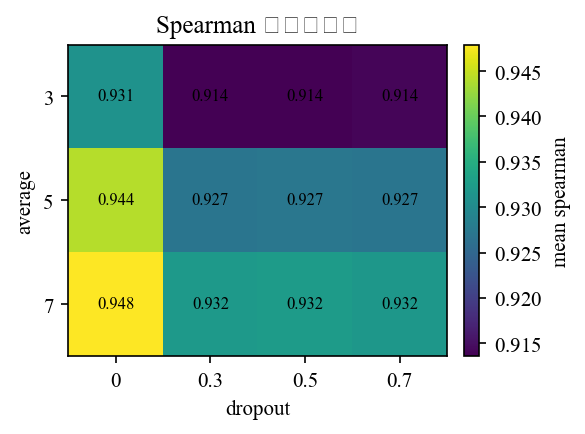

In [12]:
# -*- coding: utf-8 -*-
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读数据（你的文件名）
df = pd.read_csv("all_mapping_results_3.0.csv")

# spearman 列是 10 次结果的列表字符串，转成 list[float]
def parse_list(s):
    s = str(s).strip()
    if s.startswith("[") and s.endswith("]"):
        return list(map(float, ast.literal_eval(s)))
    return [float(x) for x in s.split(",") if x.strip() != ""]

df["spearman_list"] = df["spearman"].apply(parse_list)

# ---------- 图2：热图（单元格=10次结果的平均值） ----------
pivot = (agg.pivot(index="averge_deg", columns="dropout", values="mean")
            .sort_index(axis=0).sort_index(axis=1))

fig, ax = plt.subplots(figsize=(4,3), dpi=150)
im = ax.imshow(pivot.values, aspect="auto")
ax.set_xticks(range(pivot.shape[1]))
ax.set_yticks(range(pivot.shape[0]))
ax.set_xticklabels([f"{c:g}" for c in pivot.columns])
ax.set_yticklabels([f"{r:g}" for r in pivot.index])
ax.set_xlabel("dropout")
ax.set_ylabel("average")
ax.set_title("Spearman 平均值热图")

# 数值标注（保留3位小数）
for i in range(pivot.shape[0]):
    for j in range(pivot.shape[1]):
        ax.text(j, i, f"{pivot.values[i,j]:.3f}", ha="center", va="center", fontsize=8)

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label="mean spearman")
plt.tight_layout()
plt.show()


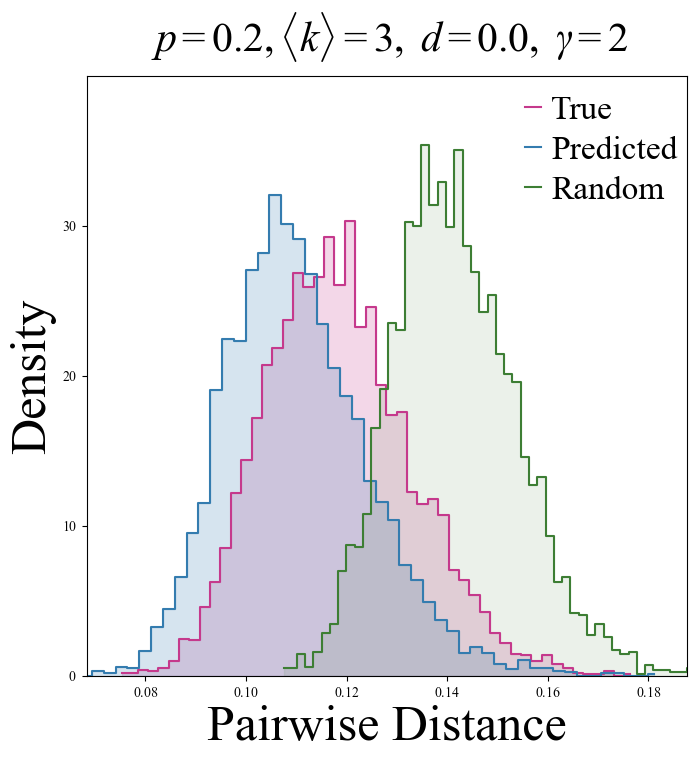

In [16]:
pred_profile = pd.read_csv(f'./mapping_pred_ad_3_p_0.05_dropout_0.3_2.5.csv', header=None).values.astype(float)
true_profile = pd.read_csv(f'./mapping_true_ad_3_p_0.05_dropout_0.3_2.5.csv', header=None).values.astype(float)
# # 1. 真实数据
true_data = true_profile

# 2. 预测数据
pred_data = pred_profile

# 3. 随机打乱数据
shuffled_data = true_data.copy()

for i in range(shuffled_data.shape[0]): #行是cells 列是cells
    np.random.shuffle(shuffled_data[i,:])

# 计算距离分布
true_dist = pdist(true_data, 'euclidean') #计算的是行与行之间的距离
pred_dist = pdist(pred_data, 'euclidean')
shuffled_dist = pdist(shuffled_data, 'euclidean')


# 创建图形和统一绘图区
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.15, 0.15, 0.75, 0.75])  # left, bottom, width, height

# 全部距离范围
all_dist = np.concatenate([true_dist, pred_dist, shuffled_dist])
min_x, max_x = np.min(all_dist), np.max(all_dist)
ax.set_xlim(min_x + 0.02 * (max_x - min_x), max_x - 0.02 * (max_x - min_x))

# True 分布
counts, bins = np.histogram(true_dist, bins=50, density=True)
ax.fill_between(bins[:-1], counts, step='mid', color=colors_xuwen[1], alpha=0.2)
ax.step(bins[:-1], counts, where='mid', label='True', color=colors_xuwen[1])

# Predicted 分布
counts, bins = np.histogram(pred_dist, bins=50, density=True)
ax.fill_between(bins[:-1], counts, step='mid', color=colors_xuwen[0], alpha=0.2)
ax.step(bins[:-1], counts, where='mid', label='Predicted', color=colors_xuwen[0])

# Null model 分布
counts, bins = np.histogram(shuffled_dist, bins=50, density=True)
ax.fill_between(bins[:-1], counts, step='mid', color=colors_xuwen[3], alpha=0.1)
ax.step(bins[:-1], counts, where='mid', label='Random', color=colors_xuwen[3])

# 坐标轴与图例
ax.set_xlabel('Pairwise Distance', fontsize=36)
ax.set_ylabel('Density', fontsize=36)
ax.set_ylim(bottom=0)
ax.set_ylim(0, 40)# 控制上下限
ax.set_yticks(np.arange(0, 40, 10))  # 设置刻度：0, 10, 20, 30, 40

ax.legend(
    fontsize=24,
    handlelength=0.5,#控制图标符合的长度，就是那三个颜色的长度
    markerscale = 0.8,
    frameon=False,#是否要框
    handletextpad=0.3,      # 符号与文字间距（默认0.5）
    columnspacing=1.0,      # 列间距（默认1.0）
    labelspacing=0.3,       # 行间距（默认0.25）
    bbox_to_anchor=(0.68, 1.018),  # (x, y) 坐标
    loc='upper left'           # 以该坐标为基准点定位
)


stats_text = r'$\ p=0.2, \langle k \rangle = 3,\ d = 0.0,\ \gamma = 2$'

ax.text(
    0.5, 1.02, stats_text,
    transform=ax.transAxes,
    ha='center', va='bottom',
    fontsize=30,
)
plt.show()

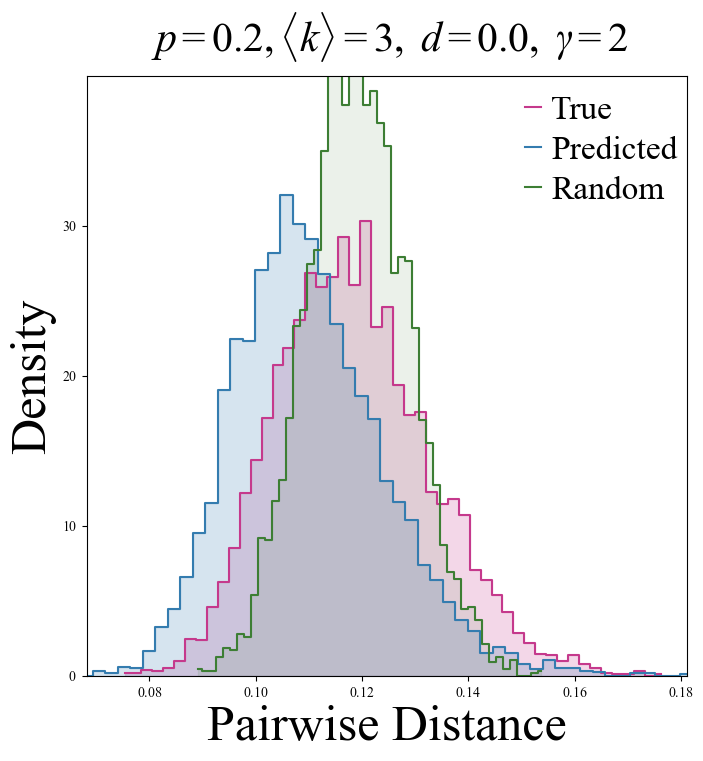

In [18]:
pred_profile = pd.read_csv(f'./mapping_pred_ad_3_p_0.05_dropout_0.3_2.5.csv', header=None).values.astype(float)
true_profile = pd.read_csv(f'./mapping_true_ad_3_p_0.05_dropout_0.3_2.5.csv', header=None).values.astype(float)
# # 1. 真实数据
true_data = true_profile

# 2. 预测数据
pred_data = pred_profile

# 3. 随机打乱数据
shuffled_data = true_data.copy()

for i in range(shuffled_data.shape[0]): #行是cells 列是genes
    np.random.shuffle(shuffled_data[:,i])

# 计算距离分布
true_dist = pdist(true_data, 'euclidean') #计算的是行与行之间的距离
pred_dist = pdist(pred_data, 'euclidean')
shuffled_dist = pdist(shuffled_data, 'euclidean')


# 创建图形和统一绘图区
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.15, 0.15, 0.75, 0.75])  # left, bottom, width, height

# 全部距离范围
all_dist = np.concatenate([true_dist, pred_dist, shuffled_dist])
min_x, max_x = np.min(all_dist), np.max(all_dist)
ax.set_xlim(min_x + 0.02 * (max_x - min_x), max_x - 0.02 * (max_x - min_x))

# True 分布
counts, bins = np.histogram(true_dist, bins=50, density=True)
ax.fill_between(bins[:-1], counts, step='mid', color=colors_xuwen[1], alpha=0.2)
ax.step(bins[:-1], counts, where='mid', label='True', color=colors_xuwen[1])

# Predicted 分布
counts, bins = np.histogram(pred_dist, bins=50, density=True)
ax.fill_between(bins[:-1], counts, step='mid', color=colors_xuwen[0], alpha=0.2)
ax.step(bins[:-1], counts, where='mid', label='Predicted', color=colors_xuwen[0])

# Null model 分布
counts, bins = np.histogram(shuffled_dist, bins=50, density=True)
ax.fill_between(bins[:-1], counts, step='mid', color=colors_xuwen[3], alpha=0.1)
ax.step(bins[:-1], counts, where='mid', label='Random', color=colors_xuwen[3])

# 坐标轴与图例
ax.set_xlabel('Pairwise Distance', fontsize=36)
ax.set_ylabel('Density', fontsize=36)
ax.set_ylim(bottom=0)
ax.set_ylim(0, 40)# 控制上下限
ax.set_yticks(np.arange(0, 40, 10))  # 设置刻度：0, 10, 20, 30, 40

ax.legend(
    fontsize=24,
    handlelength=0.5,#控制图标符合的长度，就是那三个颜色的长度
    markerscale = 0.8,
    frameon=False,#是否要框
    handletextpad=0.3,      # 符号与文字间距（默认0.5）
    columnspacing=1.0,      # 列间距（默认1.0）
    labelspacing=0.3,       # 行间距（默认0.25）
    bbox_to_anchor=(0.68, 1.018),  # (x, y) 坐标
    loc='upper left'           # 以该坐标为基准点定位
)


stats_text = r'$\ p=0.2, \langle k \rangle = 3,\ d = 0.0,\ \gamma = 2$'

ax.text(
    0.5, 1.02, stats_text,
    transform=ax.transAxes,
    ha='center', va='bottom',
    fontsize=30,
)
plt.show()

edge-wise similarity: Pred vs Real = 0.703, Shuffled vs Real = 0.012


C:\Users\24615\AppData\Local\Temp\ipykernel_49420\258285336.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


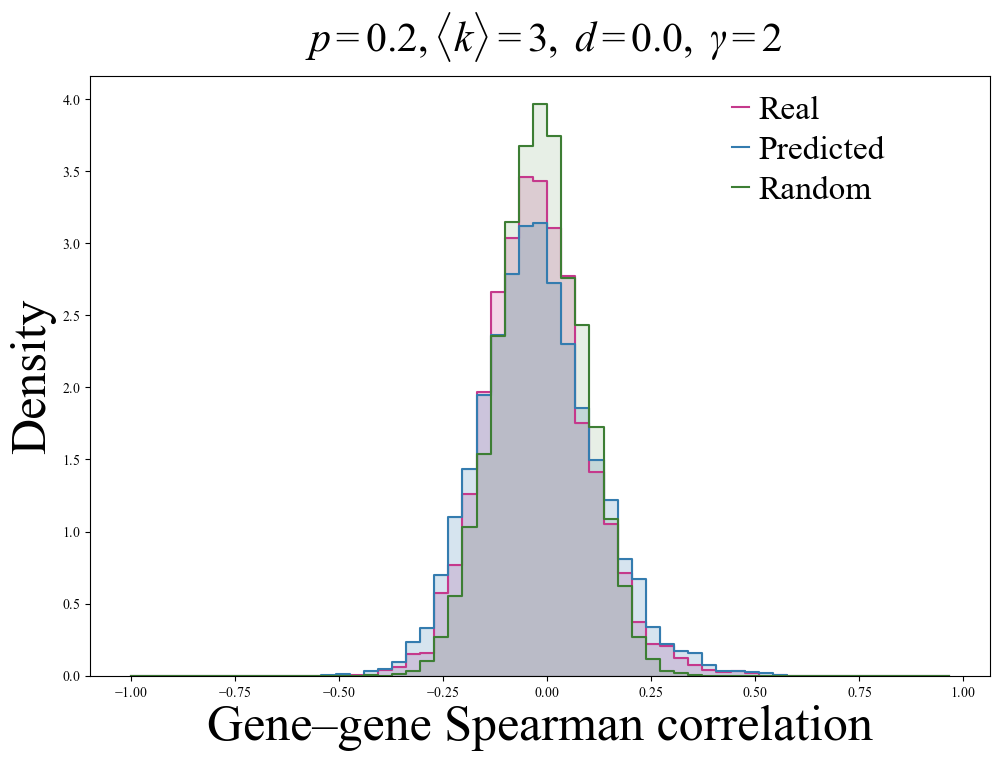

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# 读数据（cells × genes，已归一化）
pred_profile = pd.read_csv('./mapping_pred_ad_3_p_0.05_dropout_0.3_2.5.csv', header=None).values.astype(float)
true_profile = pd.read_csv('./mapping_true_ad_3_p_0.05_dropout_0.3_2.5.csv', header=None).values.astype(float)

# 1) 真实 / 预测
Z_true = true_profile          # 已归一化，直接用
Z_pred = pred_profile

# 2) 生成“假细胞”：对每个基因列，在细胞间打乱
rng = np.random.default_rng(42)
Z_shuf = Z_true.copy()
for j in range(Z_shuf.shape[1]):      # 列是 genes（按列打乱）
    rng.shuffle(Z_shuf[:, j])         # 在细胞之间打乱该基因,对基因列进行扰动

# 3) 基因–基因 Spearman 共表达矩阵（genes × genes）
def gene_gene_corr(Z,method = 'spearman'):#'pearson' | 'spearman' | 'kendall'
    return pd.DataFrame(Z).corr(method=method).values

C_true = gene_gene_corr(Z_true)
C_pred = gene_gene_corr(Z_pred)
C_shuf = gene_gene_corr(Z_shuf)

# 4) 取上三角（不含对角线）作为“所有基因对的相关系数”
def upper_tri(mat):
    m = mat.shape[0]
    iu = np.triu_indices(m, k=1)
    return mat[iu]

v_true = upper_tri(C_true)
v_pred = upper_tri(C_pred)
v_shuf = upper_tri(C_shuf)

# （可选）整体相似度
rho_pred = spearmanr(v_true, v_pred).statistic
rho_shuf = spearmanr(v_true, v_shuf).statistic
print(f'edge-wise similarity: Pred vs Real = {rho_pred:.3f}, Shuffled vs Real = {rho_shuf:.3f}')

# 5) 画“相关分布”的直方图（替代你原来的欧氏距离直方图）
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0.15, 0.15, 0.75, 0.75])

bins = np.linspace(-1, 1, 60)
try:
    c_true, c_pred, c_shuf = colors_xuwen[1], colors_xuwen[0], colors_xuwen[3]
except:
    c_true, c_pred, c_shuf = '#4C78A8', '#F58518', '#54A24B'

# Real
counts, bins = np.histogram(v_true, bins=bins, density=True)
ax.fill_between(bins[:-1], counts, step='mid', color=c_true, alpha=0.2)
ax.step(bins[:-1], counts, where='mid', label='Real', color=c_true)

# Predicted
counts, bins = np.histogram(v_pred, bins=bins, density=True)
ax.fill_between(bins[:-1], counts, step='mid', color=c_pred, alpha=0.2)
ax.step(bins[:-1], counts, where='mid', label='Predicted', color=c_pred)

# Shuffled
counts, bins = np.histogram(v_shuf, bins=bins, density=True)
ax.fill_between(bins[:-1], counts, step='mid', color=c_shuf, alpha=0.12)
ax.step(bins[:-1], counts, where='mid', label='Random', color=c_shuf)

# 坐标轴与图例（沿用你的风格，改下 x 轴名称）
ax.set_xlabel('Gene–gene Spearman correlation', fontsize=36)
ax.set_ylabel('Density', fontsize=36)
ax.set_ylim(bottom=0)
ax.legend(
    fontsize=24, handlelength=0.5, markerscale=0.8, frameon=False,
    handletextpad=0.3, columnspacing=1.0, labelspacing=0.3,
    bbox_to_anchor=(0.68, 1.018), loc='upper left'
)

stats_text = r'$\ p=0.2, \langle k \rangle = 3,\ d = 0.0,\ \gamma = 2$'
ax.text(0.5, 1.02, stats_text, transform=ax.transAxes, ha='center', va='bottom', fontsize=30)

plt.tight_layout()
plt.show()



Edge-wise similarity (Spearman): Pred vs Real = 0.700, Shuffled vs Real = 0.011


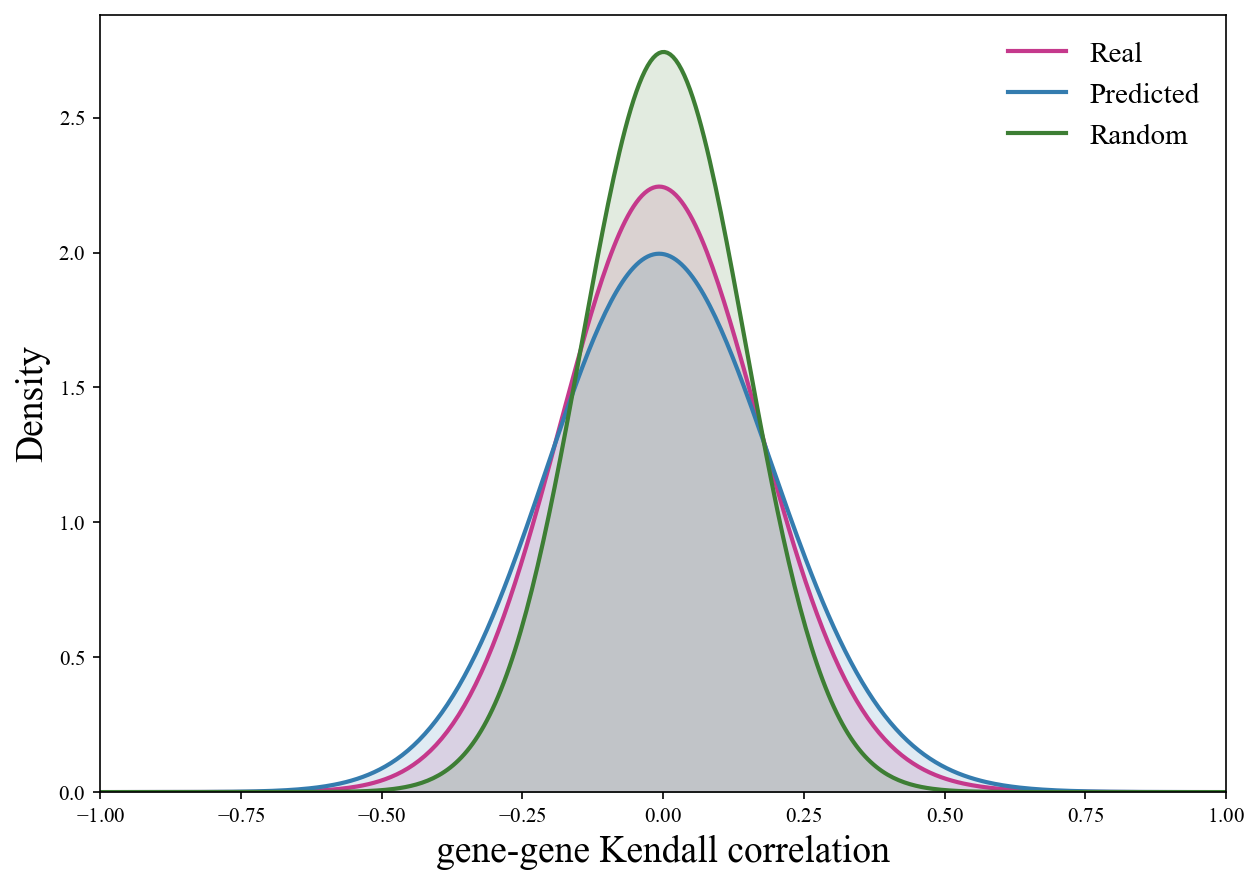

In [54]:

# -*- coding: utf-8 -*-
"""
cells×genes 的（已归一化）表达矩阵：
1) 读取 Real / Pred
2) 生成 Random（按基因列在细胞间打乱）
3) 计算基因-基因共表达矩阵（Spearman）
4) 抽上三角向量（所有基因对）
5) 用 KDE(density) 画平滑曲线
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, gaussian_kde

# ============= 配置 =============
corr_method = 'kendall'   # 'spearman' | 'pearson' | 'kendall'
seed = 42                 # 打乱的随机种子
bw_scale = 8.8             # KDE 平滑强度（越大越平）
bw_rule = 'silverman'          # 'scott' 或 'silverman'
xs = np.linspace(-1, 1, 400)   # KDE 的公共横轴（相关系数范围）

# ============= 1) 读数据（cells × genes，已归一化） =============
pred_profile = pd.read_csv('./mapping_pred_ad_3_p_0.05_dropout_0.3_2.5.csv', header=None).values.astype(float)
true_profile = pd.read_csv('./mapping_true_ad_3_p_0.05_dropout_0.3_2.5.csv', header=None).values.astype(float)

Z_true = true_profile
Z_pred = pred_profile

# ============= 2) 生成“假细胞” =============
# 对每个“基因列”在细胞间打乱 -> 保留每个基因的边缘分布，打掉细胞内协同
rng = np.random.default_rng(seed)
Z_shuf = Z_true.copy()
for j in range(Z_shuf.shape[1]):     # 列是 genes
    rng.shuffle(Z_shuf[:, j])        # 在 cells 之间重排该基因

# ============= 3) 基因-基因共表达矩阵（genes × genes） =============
def gene_gene_corr(Z, method='spearman'):
    """对列（基因）之间求相关，返回 genes×genes 矩阵"""
    return pd.DataFrame(Z).corr(method=method).values

C_true = gene_gene_corr(Z_true, corr_method)
C_pred = gene_gene_corr(Z_pred, corr_method)
C_shuf = gene_gene_corr(Z_shuf, corr_method)

# ============= 4) 抽上三角（所有基因对的相关系数） =============
def upper_tri(mat):
    n = mat.shape[0]
    iu = np.triu_indices(n, k=1)
    return mat[iu]

v_true = upper_tri(C_true)
v_pred = upper_tri(C_pred)
v_shuf = upper_tri(C_shuf)

# （可选）整体一致性：把两矩阵的边向量做 Spearman
rho_pred = spearmanr(v_true, v_pred).statistic
rho_shuf = spearmanr(v_true, v_shuf).statistic
print(f'Edge-wise similarity (Spearman): Pred vs Real = {rho_pred:.3f}, Shuffled vs Real = {rho_shuf:.3f}')

# ============= 5) KDE（density）平滑曲线绘图 =============
def kde_line(ax, data, color, label, fill_alpha=0.15, bw_scale=3.8, bw_rule='scott'):
    """在 ax 上画 KDE 平滑曲线（density 归一化，面积=1）"""
    data = np.asarray(data); data = data[~np.isnan(data)]
    if bw_rule == 'silverman':
        kde = gaussian_kde(data, bw_method=lambda s: bw_scale * s.silverman_factor())
    else:
        kde = gaussian_kde(data, bw_method=lambda s: bw_scale * s.scotts_factor())
    ys = kde(xs)
    ax.plot(xs, ys, color=color, label=label, lw=2)
    ax.fill_between(xs, 0, ys, color=color, alpha=fill_alpha)

# 颜色（若你有自定义 colors_xuwen，这里优先用）
try:
    col_real, col_pred, col_shuf = colors_xuwen[1], colors_xuwen[0], colors_xuwen[3]
except Exception:
    col_real, col_pred, col_shuf = '#C44E52', '#4C72B0', '#55A868'

fig = plt.figure(figsize=(8.5, 6.0), dpi=150)
ax = fig.add_subplot(111)

kde_line(ax, v_true, col_real, 'Real',      bw_scale=bw_scale, bw_rule=bw_rule)
kde_line(ax, v_pred, col_pred, 'Predicted', bw_scale=bw_scale, bw_rule=bw_rule)
kde_line(ax, v_shuf, col_shuf, 'Random',    bw_scale=bw_scale, bw_rule=bw_rule)

ax.set_xlim(-1, 1)
ax.set_ylim(bottom=0)
ax.set_xlabel(f'gene-gene {corr_method.capitalize()} correlation', fontsize=18)
ax.set_ylabel('Density', fontsize=18)
ax.legend(frameon=False, fontsize=14)
plt.tight_layout()
plt.show()


Edge-wise similarity (Spearman): Pred vs Real = 0.703, Shuffled vs Real = 0.012


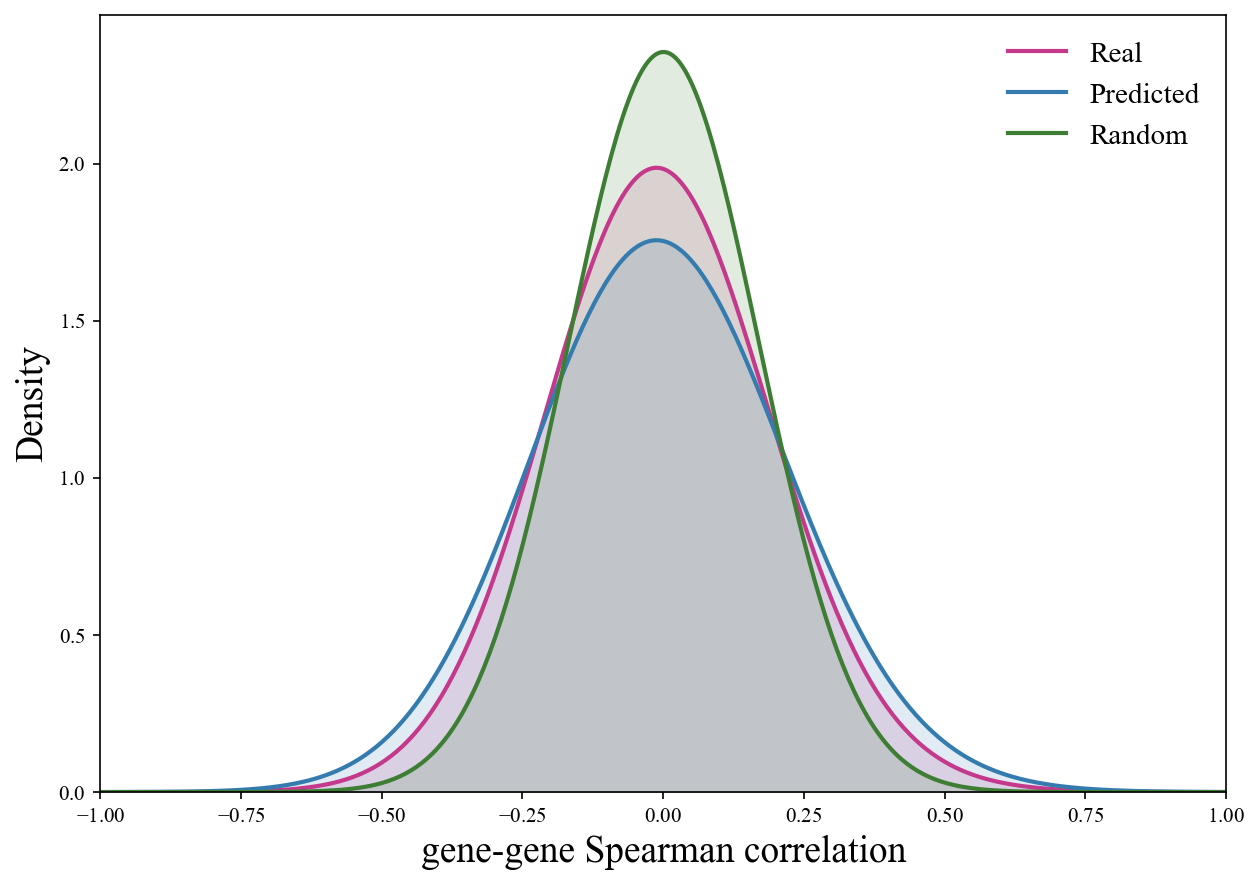

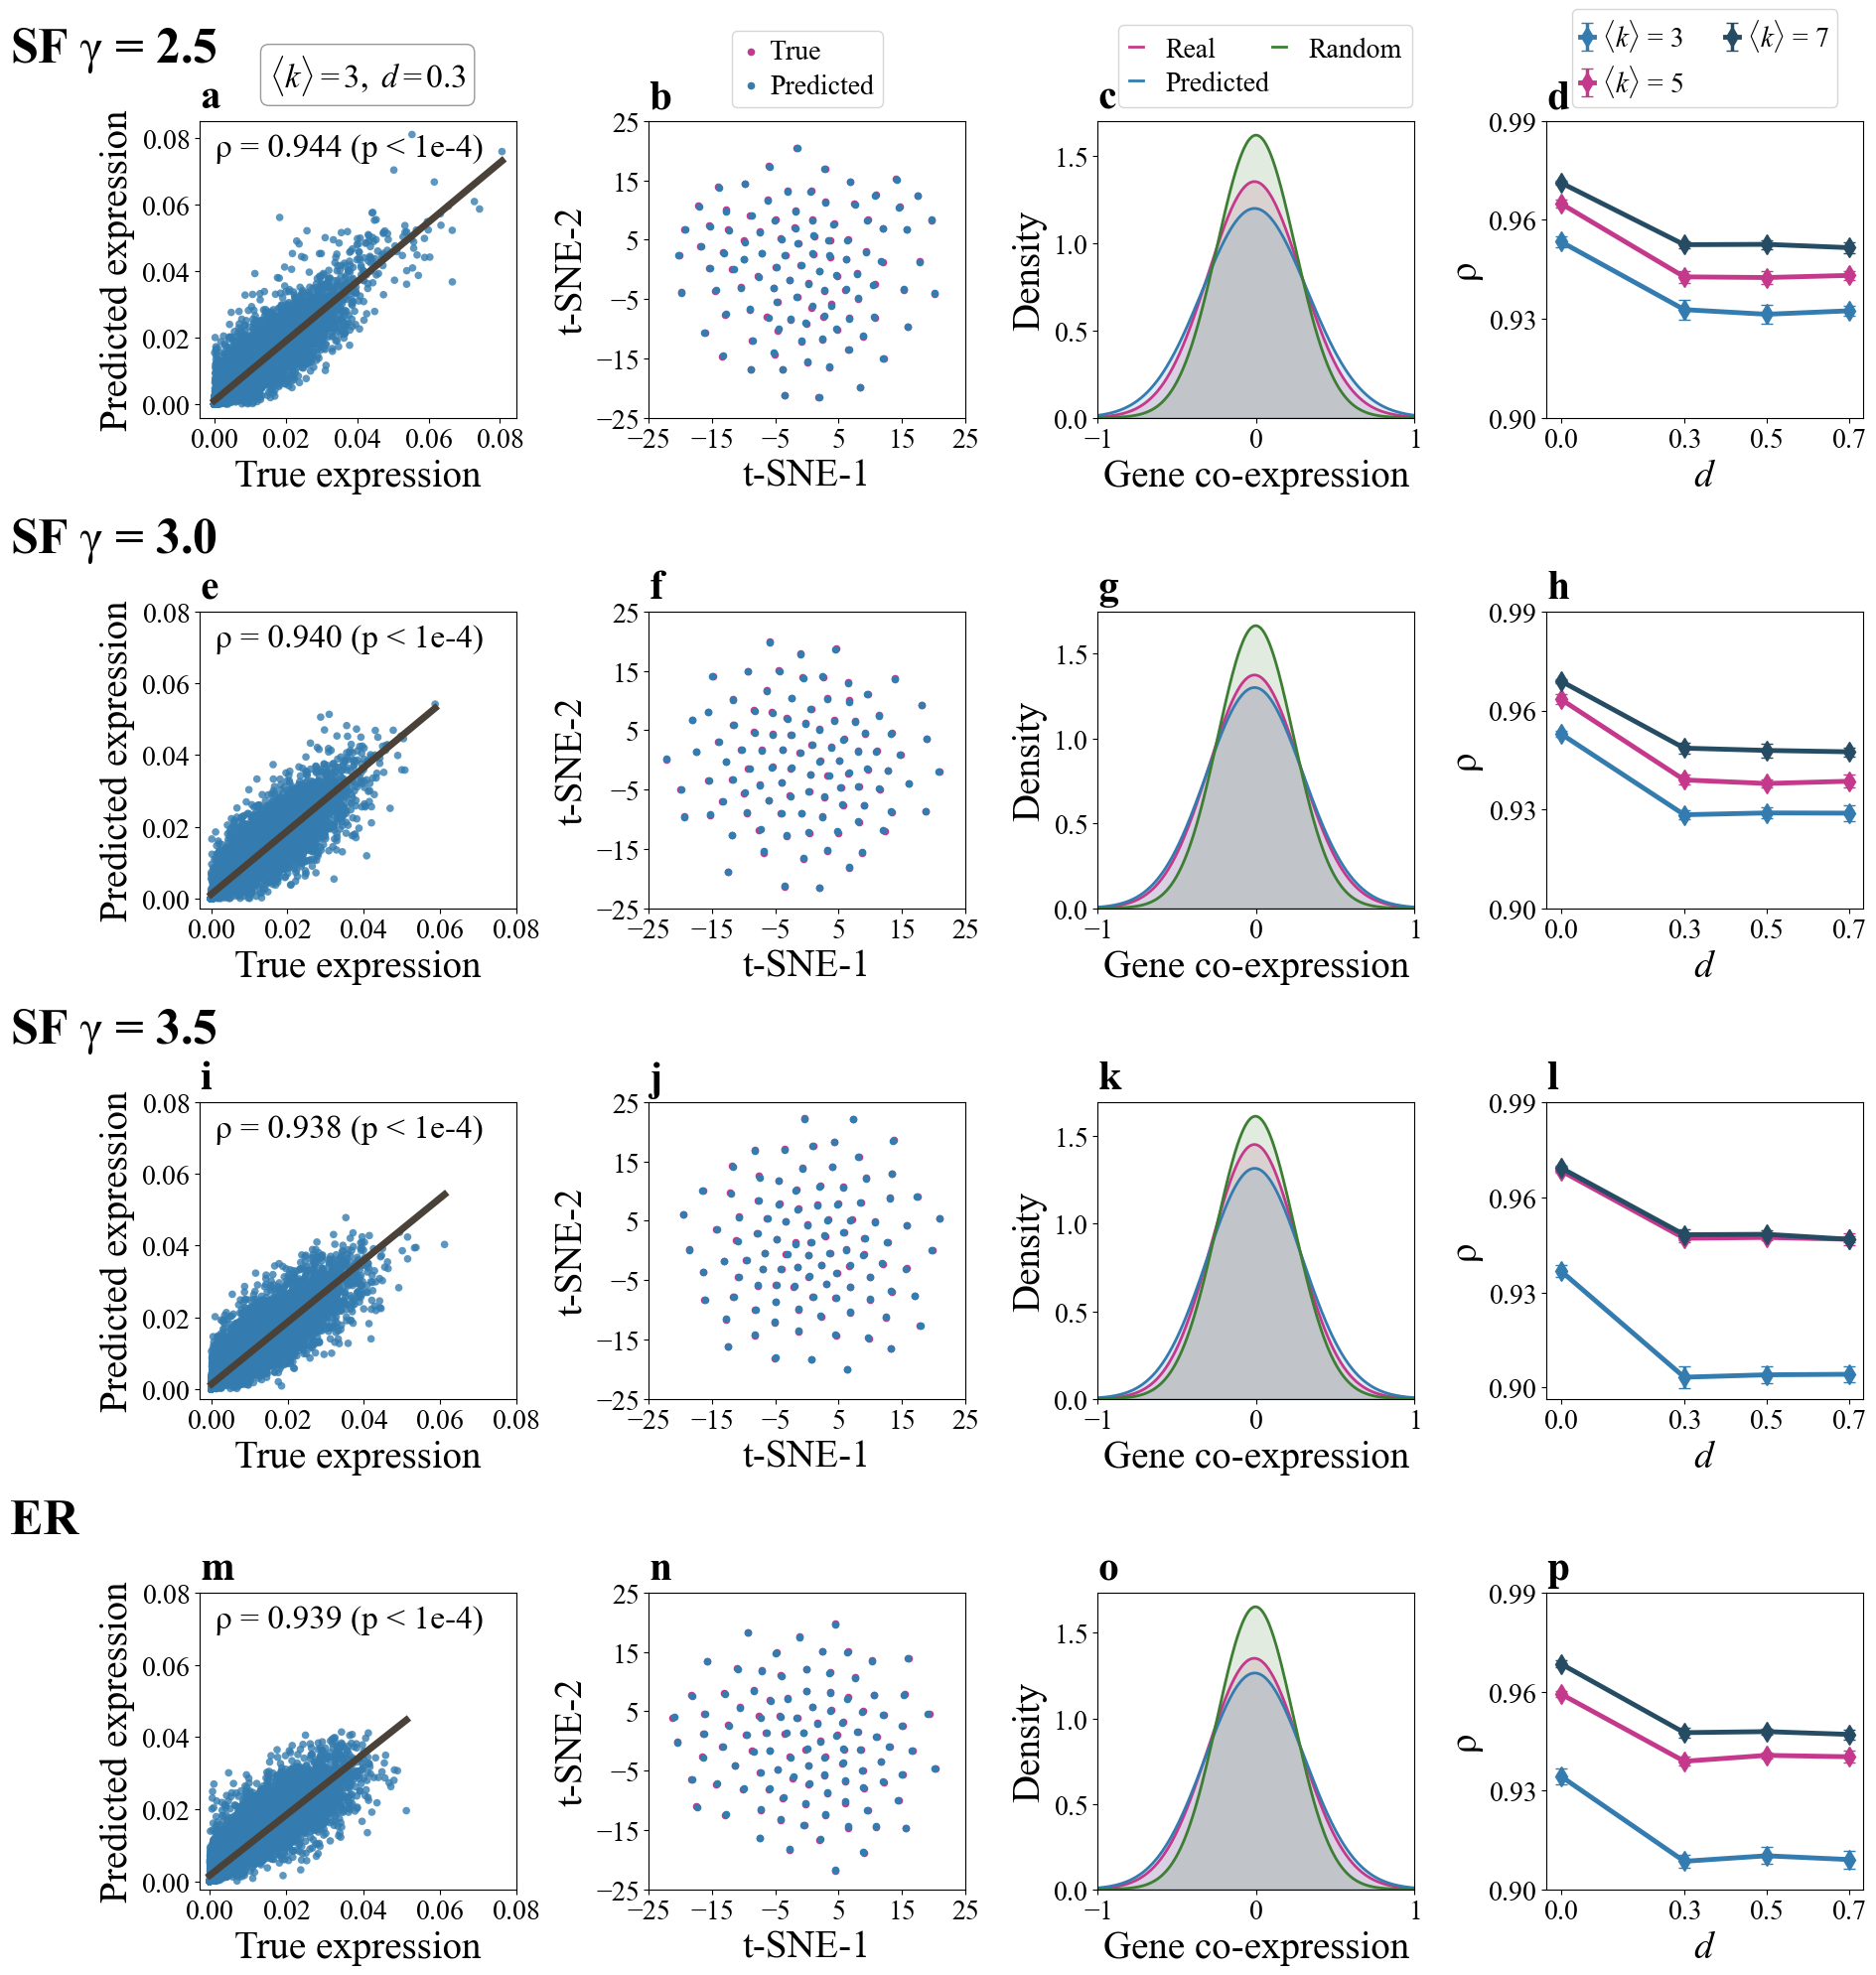

Edge-wise similarity (Spearman): Pred vs Real = 0.703, Shuffled vs Real = 0.012


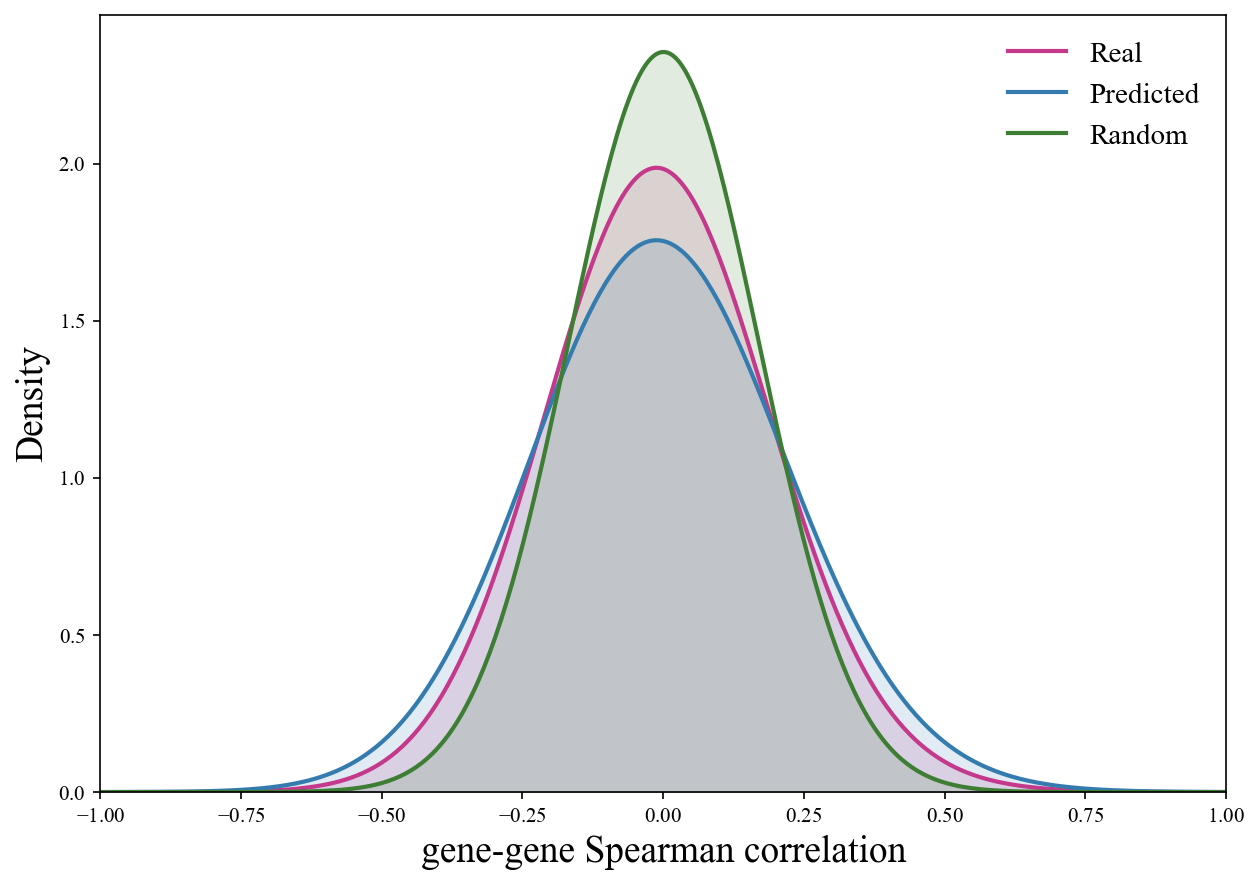

In [110]:
"""
cells×genes 的（已归一化）表达矩阵：
1) 读取 Real / Pred
2) 生成 Random（按基因列在细胞间打乱）
3) 计算基因-基因共表达矩阵（Spearman）
4) 抽上三角向量（所有基因对）
5) 用 KDE(density) 画平滑曲线
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, gaussian_kde

# ============= 配置 =============
corr_method = 'spearman'   # 'spearman' | 'pearson' | 'kendall'
seed = 42                 # 打乱的随机种子
bw_scale = 6.8             # KDE 平滑强度（越大越平）
bw_rule = 'silverman'          # 'scott' 或 'silverman'
xs = np.linspace(-1, 1, 400)   # KDE 的公共横轴（相关系数范围）

# ============= 1) 读数据（cells × genes，已归一化） =============
pred_profile = pd.read_csv('./mapping_pred_ad_3_p_0.05_dropout_0.3_2.5.csv', header=None).values.astype(float)
true_profile = pd.read_csv('./mapping_true_ad_3_p_0.05_dropout_0.3_2.5.csv', header=None).values.astype(float)

Z_true = true_profile
Z_pred = pred_profile

# ============= 2) 生成“假细胞” =============
# 对每个“基因列”在细胞间打乱 -> 保留每个基因的边缘分布，打掉细胞内协同
rng = np.random.default_rng(seed)
Z_shuf = Z_true.copy()
for j in range(Z_shuf.shape[1]):     # 列是 genes
    rng.shuffle(Z_shuf[:, j])        # 在 cells 之间重排该基因

# ============= 3) 基因-基因共表达矩阵（genes × genes） =============
def gene_gene_corr(Z, method='spearman'):
    """对列（基因）之间求相关，返回 genes×genes 矩阵"""
    return pd.DataFrame(Z).corr(method=method).values

C_true = gene_gene_corr(Z_true, corr_method)
C_pred = gene_gene_corr(Z_pred, corr_method)
C_shuf = gene_gene_corr(Z_shuf, corr_method)

# ============= 4) 抽上三角（所有基因对的相关系数） =============
def upper_tri(mat):
    n = mat.shape[0]
    iu = np.triu_indices(n, k=1)
    return mat[iu]

v_true = upper_tri(C_true)
v_pred = upper_tri(C_pred)
v_shuf = upper_tri(C_shuf)

# （可选）整体一致性：把两矩阵的边向量做 Spearman
rho_pred = spearmanr(v_true, v_pred).statistic
rho_shuf = spearmanr(v_true, v_shuf).statistic
print(f'Edge-wise similarity (Spearman): Pred vs Real = {rho_pred:.3f}, Shuffled vs Real = {rho_shuf:.3f}')

# ============= 5) KDE（density）平滑曲线绘图 =============
def kde_line(ax, data, color, label, fill_alpha=0.15, bw_scale=3.8, bw_rule='scott'):
    """在 ax 上画 KDE 平滑曲线（density 归一化，面积=1）"""
    data = np.asarray(data); data = data[~np.isnan(data)]
    if bw_rule == 'silverman':
        kde = gaussian_kde(data, bw_method=lambda s: bw_scale * s.silverman_factor())
    else:
        kde = gaussian_kde(data, bw_method=lambda s: bw_scale * s.scotts_factor())
    ys = kde(xs)
    ax.plot(xs, ys, color=color, label=label, lw=2)
    ax.fill_between(xs, 0, ys, color=color, alpha=fill_alpha)

# 颜色（若你有自定义 colors_xuwen，这里优先用）
try:
    col_real, col_pred, col_shuf = colors_xuwen[1], colors_xuwen[0], colors_xuwen[3]
except Exception:
    col_real, col_pred, col_shuf = '#C44E52', '#4C72B0', '#55A868'

fig = plt.figure(figsize=(8.5, 6.0), dpi=150)
ax = fig.add_subplot(111)

kde_line(ax, v_true, col_real, 'Real',      bw_scale=bw_scale, bw_rule=bw_rule)
kde_line(ax, v_pred, col_pred, 'Predicted', bw_scale=bw_scale, bw_rule=bw_rule)
kde_line(ax, v_shuf, col_shuf, 'Random',    bw_scale=bw_scale, bw_rule=bw_rule)

ax.set_xlim(-1, 1)
ax.set_ylim(bottom=0)
ax.set_xlabel(f'gene-gene {corr_method.capitalize()} correlation', fontsize=18)
ax.set_ylabel('Density', fontsize=18)
ax.legend(frameon=False, fontsize=14)
plt.tight_layout()
plt.show()